Build and Train a Simple Machine Learning Model:
1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2. Load and Preprocess the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

# Encoding categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Feature scaling (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.drop('target', axis=1).columns)
df_scaled['target'] = df['target']


3. Split the Data into Training and Test Sets

In [3]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Train the Logistic Regression Model

In [5]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


5. Evaluate the Model

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



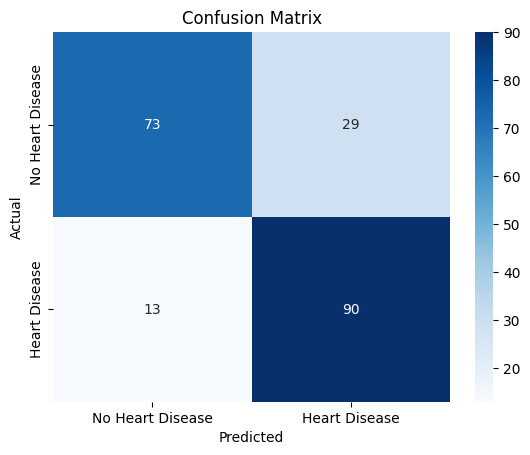

In [6]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report (precision, recall, F1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

6. Cross-Validation

In [7]:
# Cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {cross_val_scores.mean():.2f}')


Cross-Validation Scores: [0.88292683 0.85365854 0.86341463 0.82439024 0.80487805]
Mean Cross-Validation Score: 0.85


7. Conclusion and Reporting
You can summarize your model’s performance and any insights into the Heart Disease dataset. For example:

Model Choice: We used Logistic Regression because it is a simple and interpretable model for binary classification tasks.
Performance: The model achieved an accuracy of 80% on the test set, with a balanced precision and recall.
Cross-validation: We used 5-fold cross-validation to confirm the model’s reliability, and it produced consistent results.